In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [17]:
data = pd.read_csv('heart.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Размер датасета

In [18]:
data.shape

(299, 13)

Статистическая информация

In [19]:
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Информация о наборе данных

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [21]:
data['creatinine_phosphokinase'].unique()

array([ 582, 7861,  146,  111,  160,   47,  246,  315,  157,  123,   81,
        231,  981,  168,   80,  379,  149,  125,   52,  128,  220,   63,
        148,  112,  122,   60,   70,   23,  249,  159,   94,  855, 2656,
        235,  124,  571,  127,  588, 1380,  553,  129,  577,   91, 3964,
         69,  260,  371,   75,  607,  789,  364, 7702,  318,  109,   68,
        250,  110,  161,  113, 5882,  224,   92,  102,  203,  336,   76,
         55,  280,   78,   84,  115,   66,  897,  154,  144,  133,  514,
         59,  156,   61,  305,  898, 5209,   53,  328,  748, 1876,  936,
        292,  369,  143,  754,  400,   96,  737,  358,  200,  248,  270,
       1808, 1082,  719,  193, 4540,  646,  281, 1548,  805,  291,  482,
        943,  185,  132, 1610, 2261,  233,   30, 1846,  335,   58,  910,
         72,  130, 2334, 2442,  776,  196,  835, 3966,  171,  198,   95,
       1419,  478,  176,  395,   99,  145,  104, 1896,  151,  244,   62,
        121,  418,  167, 1211, 1767,  308,   97,   

In [22]:
data['creatinine_phosphokinase'].value_counts()

,count
creatinine_phosphokinase,
582,47
66,4
129,4
231,3
69,3
...,...
748,1
1876,1
936,1


Разобьем датасет на:
Y - целевая переменная, которую предсказываем (diagnosis).
X - весь набор данных без целевой переменной.

In [24]:
X = data.drop(['creatinine_phosphokinase'], axis=1)
y = data['creatinine_phosphokinase']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (299, 12) | y shape: (299,) 


Стандартизация данных

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

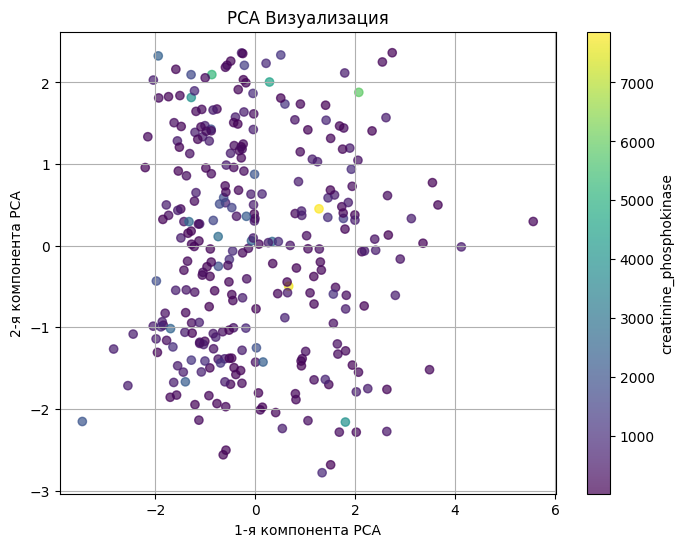

In [27]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='creatinine_phosphokinase')
plt.title('РСА Визуализация')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.grid()
plt.show()

K-Means
Найдем оптимальное количество классов для алгоритма KMeans с помощью метода логтя

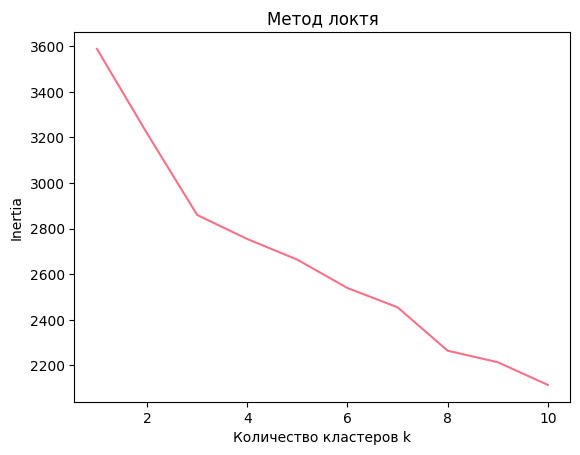

In [28]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()

Оптимальное число кластеров - 2

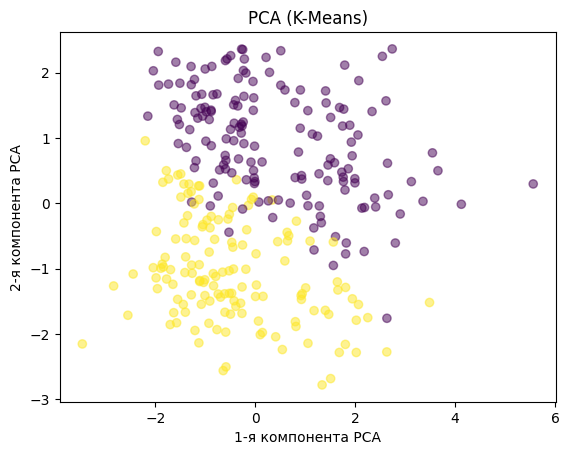

Оценка силуэта: 0.1053712359309515
Скорректированный индекс Рэнда: 0.0010383838062329287


In [29]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, alpha=0.5)
plt.title('РСА (K-Means)')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.show()

print("Оценка силуэта:", silhouette_score(X_scaled, labels_kmeans))
print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_kmeans))

Иерархическая кластеризация
Агломеративная кластеризация

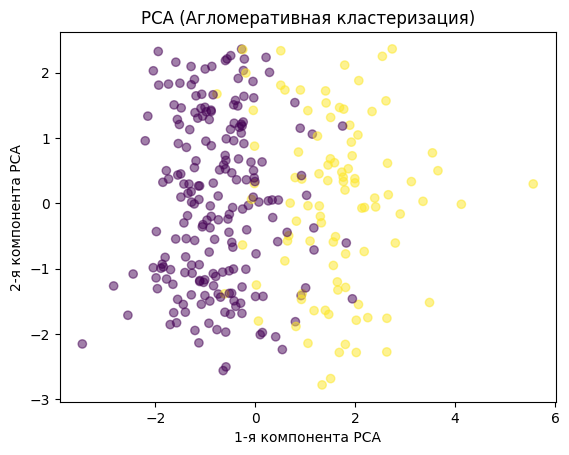

Оценка силуэта: 0.13590465774525315
Скорректированный индекс Рэнда: -0.0016258214393963695


In [30]:
aggl = AgglomerativeClustering(n_clusters=2)
labels_aggl = aggl.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_aggl, alpha=0.5)
plt.title('РСА (Агломеративная кластеризация)')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.show()

print("Оценка силуэта:", silhouette_score(X_scaled, labels_aggl))
print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_aggl))

DBSCAN

In [31]:
from ipywidgets import interact

colors = ['green', 'red', 'blue']

@interact(epsilon=(0, 5.0, 0.05), min_samples=(3, 100, 1))
def plot_dbscan(epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels_dbsc = dbscan.fit_predict(X_scaled)
    unique_labels = set(labels_dbsc)

    for i, label in enumerate(unique_labels):
      if label == -1:
          plt.scatter(X_scaled[labels_dbsc == label, 0], X_scaled[labels_dbsc == label, 1],
                      c='black', label=f'Шум', alpha=0.5)
      else:
          plt.scatter(X_scaled[labels_dbsc == label, 0], X_scaled[labels_dbsc == label, 1],
                      c=colors[i], label=f'Кластер {label}', alpha=0.5)

    plt.title('DBSCAN')
    plt.xlabel('1-я компонента')
    plt.ylabel('2-я компонента')
    plt.legend()
    plt.show()
    print("Оценка силуэта:", silhouette_score(X_scaled, labels_dbsc))
    print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_dbsc))

interactive(children=(FloatSlider(value=2.5, description='epsilon', max=5.0, step=0.05), IntSlider(value=51, d…

K-Means показывает более высокие оценки силуэта и скорректированного индекса Рэнда, хотя скорретированный индекс Рэнда очень маленький, что говорит о том, что он лучше разделяет кластеры и лучше согласуется с истинными метками, чем агломеративная кластеризация.